<a href="https://colab.research.google.com/github/Syntax-code/Machine-Learning/blob/master/Air_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzed the data for pollutants in air in the yaer 2020 and in year 2019 between the date jan2019-may2019 and jan2020-may2020

Dataset from kaggle

In [0]:
!pip install kaggle --upgrade
!kaggle --version
from google.colab import files
files.upload()

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kartikchourasiya","key":"807c8d14f49cd514a2015f84a2a567f1"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#chamge permission
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d rohanrao/air-quality-data-in-india/city_day.csv

 74% 49.0M/66.4M [00:01<00:00, 24.8MB/s]
100% 66.4M/66.4M [00:01<00:00, 44.4MB/s]


In [0]:
!unzip air-quality-data-in-india.zip

Archive:  air-quality-data-in-india.zip
  inflating: city_day.csv            
  inflating: city_hour.csv           
  inflating: station_day.csv         
  inflating: station_hour.csv        
  inflating: stations.csv            


In [0]:
import pandas as pd
import numpy as np

In [0]:
dataset = pd.read_csv('city_day.csv')
dataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [0]:
dataset.shape

(26219, 16)

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26219 entries, 0 to 26218
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        26219 non-null  object 
 1   Date        26219 non-null  object 
 2   PM2.5       21930 non-null  float64
 3   PM10        15453 non-null  float64
 4   NO          22986 non-null  float64
 5   NO2         23002 non-null  float64
 6   NOx         22176 non-null  float64
 7   NH3         16372 non-null  float64
 8   CO          24258 non-null  float64
 9   SO2         22675 non-null  float64
 10  O3          22559 non-null  float64
 11  Benzene     20932 non-null  float64
 12  Toluene     18664 non-null  float64
 13  Xylene      9412 non-null   float64
 14  AQI         21937 non-null  float64
 15  AQI_Bucket  21937 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.2+ MB


In [0]:
dataset.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
std,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [0]:
dataset_delhi = dataset[dataset['City'] == 'Delhi']
dataset_delhi.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
9294,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
9295,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
9296,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
9297,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
9298,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [0]:
dataset_delhi.shape

(1948, 16)

In [0]:
dataset_delhi.isnull().sum()

City            0
Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64

In [0]:
dataset_delhi.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
11237,Delhi,2020-04-27,27.18,53.02,8.28,14.80,16.38,29.94,0.76,15.59,53.43,1.24,6.39,0.00,98.0,Satisfactory
11238,Delhi,2020-04-28,41.75,80.36,10.32,17.35,20.03,28.60,0.86,17.60,58.96,1.70,8.30,0.00,105.0,Moderate
11239,Delhi,2020-04-29,55.18,114.91,12.66,20.11,22.66,28.86,0.91,19.08,58.57,2.03,13.02,0.01,123.0,Moderate
11240,Delhi,2020-04-30,49.96,115.63,12.73,17.61,20.45,32.99,0.84,17.42,59.55,1.68,9.27,0.00,128.0,Moderate
11241,Delhi,2020-05-01,61.75,128.23,12.02,26.98,27.17,33.70,0.97,17.12,33.70,1.99,17.24,0.00,144.0,Moderate


In [0]:
mask = (dataset_delhi['Date'] >= "2020-01-01") & (dataset_delhi['Date'] <= "2020-05-01")

In [0]:
dataset_delhi_2020 = dataset_delhi.loc[mask]

In [0]:
dataset_delhi_2020.shape

(122, 16)

In [0]:
mask1 = (dataset_delhi['Date'] >= "2019-01-01") & (dataset_delhi['Date'] <= "2019-05-02")

In [0]:
dataset_delhi_2019 = dataset_delhi.loc[mask1]

In [0]:
date = dataset_delhi_2020['Date']
dataset_delhi_2020.drop(columns = ['City', 'Date', 'AQI_Bucket'])
dataset_delhi_2019.drop(columns = ['City', 'Date', 'AQI_Bucket'])

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
10755,287.34,461.02,92.04,69.46,121.07,56.66,2.54,17.77,39.58,8.09,48.84,2.21,475.0
10756,331.20,515.72,101.08,75.06,133.85,63.63,2.78,18.27,43.30,10.04,58.70,2.42,501.0
10757,355.40,519.34,77.92,66.20,106.99,61.02,2.55,15.12,39.77,8.91,56.57,3.28,537.0
10758,246.46,388.79,47.83,57.53,74.39,53.09,2.01,13.22,28.75,6.78,40.50,0.93,432.0
10759,262.53,411.49,64.97,60.35,90.67,56.49,2.23,15.59,36.33,8.50,51.69,1.29,440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10872,76.44,285.73,17.66,40.90,35.31,25.63,1.06,20.02,54.00,2.53,25.12,0.86,269.0
10873,84.04,274.83,33.17,52.04,53.91,27.82,1.33,23.71,50.32,4.05,31.90,0.85,256.0
10874,95.72,284.13,32.91,59.32,57.61,31.91,1.62,26.58,57.54,4.92,33.92,0.75,257.0
10875,111.57,323.97,35.18,63.15,58.94,36.73,1.61,27.67,65.95,4.87,31.18,0.72,285.0


In [0]:
dataset_delhi_2020.shape

(122, 16)

In [0]:
dataset_delhi_2020_mean = dataset_delhi_2020.mean(axis = 0, skipna = True)
dataset_delhi_2019_mean = dataset_delhi_2019.mean(axis = 0, skipna = True)
dataset_delhi_2020_mean

PM2.5       94.968689
PM10       170.762459
NO          29.522377
NO2         37.688770
NOx         47.436803
NH3         35.586639
CO           1.130656
SO2         13.948361
O3          36.841066
Benzene      3.147705
Toluene     21.444262
Xylene       0.904590
AQI        204.172131
dtype: float64

In [0]:
dataset_delhi_2019_mean

PM2.5      123.171475
PM10       237.615246
NO          38.852787
NO2         50.845164
NOx         62.558197
NH3         38.396967
CO           1.447131
SO2         18.217459
O3          40.556475
Benzene      4.499508
Toluene     32.541967
Xylene       1.185000
AQI        260.877049
dtype: float64

In [0]:
labels = list(dataset_delhi_2020.columns)
labels.remove('City')
labels.remove('Date')
labels.remove('AQI_Bucket')
labels

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI']

Data of diff chemicals of year 2019 jan - may to 2020 jan - may

In [0]:
import matplotlib.pyplot as plt

<BarContainer object of 13 artists>

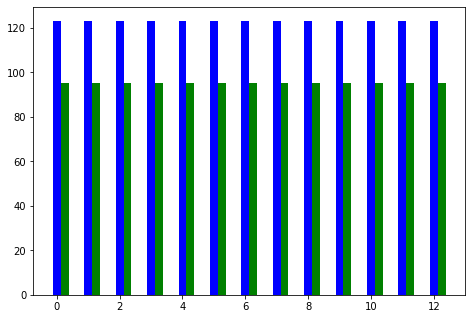

In [0]:
data1 = dataset_delhi_2019_mean['PM2.5']
data2 =  dataset_delhi_2020_mean['PM2.5']
X = np.arange(len(labels))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data1, color = 'b', width = 0.25)
ax.bar(X + 0.25, data2, color = 'g', width = 0.25)

blue is 2019

green in 2020

In [0]:
dataset_delhi_2019_mean.shape

(13,)

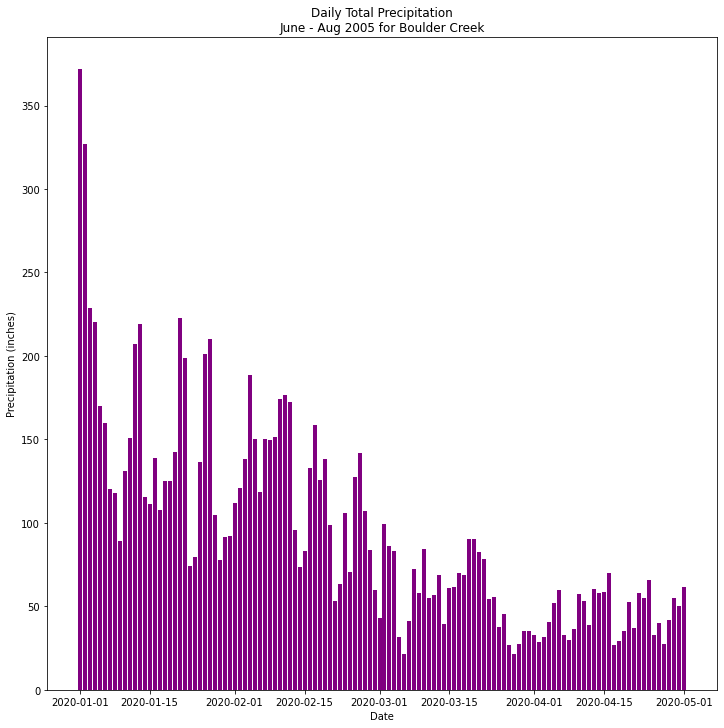

In [0]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(x = dataset_delhi_2020['Date'],
       dataset_delhi_2020['PM2.5'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="chemicals",
       title="2019 - 2020")

plt.show()

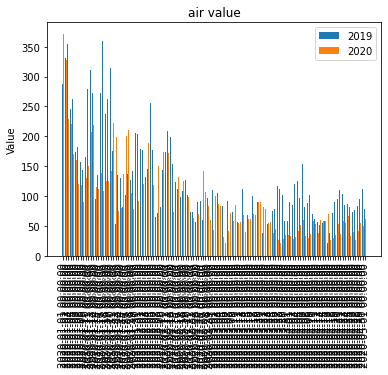

In [0]:
labels = dataset_delhi_2020['Date']
men_means = dataset_delhi_2019['PM2.5']
women_means = dataset_delhi_2020['PM2.5']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='2019')
rects2 = ax.bar(x + width/2, women_means, width, label='2020')

ax.set_ylabel('Value')
ax.set_title('air value')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.xticks(rotation='vertical')
plt.show()

<BarContainer object of 122 artists>

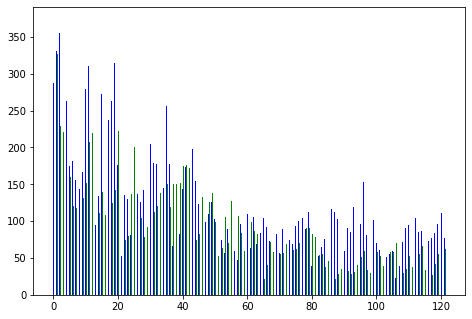

In [0]:
labels = dataset_delhi_2020['Date'] 
data1 = dataset_delhi_2019['PM2.5']
data2 =  dataset_delhi_2020['PM2.5']
X = np.arange(len(labels))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data1, color = 'b', width = 0.25)
ax.bar(X + 0.25, data2, color = 'g', width = 0.25)

As you acn see in the above figures there as been a vast difference in the emmisions of the pollutants in 2019 and in the quarantine in delhi.

There is a constant decrease in all pollutants not just CO alone but all pollutants have been seen a constant decrease in growth in 2020.

As the effect of the quarantine is seen to lose the pollutants show their usual numbers as compared to 2019.